# COGS 108 - Earnings, Tenure, and Professor Ratings

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

In this project, we will explore the relationship between UC San Diego Professor yearly salary, their tenure status, and their respective CAPE ratings in an attempt to understand how earnings and tenure status correlates with student recommendation and satisfaction. To answer our question, we compiled CAPE data from Seascape, a website that collects data directly from UCSD CAPE, and web scraped Professor salary data and tenure status directly from the UC University of California annual employee pay website. For our results, utilizing linear regression and point biserial correlation approach,we will see there is a correlation between tenure status and student rating, with tenured professors having worse ratings in comparison to non tenured professors. 

# Contributors

- Josie Li
- Jodie Li
- Kelly Leon
- Sergio Ramirez
- Mary Kovic

<a id='research_question'></a>
# Research Question

Are UCSD professors who receive higher salaries more likely to receive a lower approval rating than those who receive lower salaries?

## Background and Prior Work

Our interest in this topic comes from our initial observations about professors we have taken classes from and their salaries. We notice that the professors that have higher ratings on CAPEs (Course And Professor Evaluations) tend to receive lower salaries compared to professors that have lower ratings. We are interested in exploring if there is any correlation between salary and CAPES rating. 



There have been several studies exploring the relationship between gender, age, salary, and perceived attractiveness of university professors and student impressions. Generally, perceived attractiveness has been found to be positively correlated with student ratings on quality, clarity, and helpfulness [1, 2]. While young female professors typically rate highest in attractiveness, male professors tend to be viewed more favorably and rated higher in competence [2, 3]. Research has also indicated a positive relationship between intstructional ratings and percent salary increase, although one study found that this was largely prevalent only among male professors and not female professors [4,5]. Additonally, work in research has been found to be correlated with faculty rewards including tenured positions and salary increases [6]. Interestingly, one study from Northwestern University found that freshman students who had taken courses from tenured and tenure-track professors were less likely to take a second course in a given field and recieved lower marks than students who had taken a course taught by adjunct or non-tenure professors[8].




### Why should we care?
With the rise of the internet, rating websites such at Ratemyprofessor.com have increased in popularity. Though approval ratings don't always honestly reflect the quality of teaching, there is some merit to such reviews as students continue to use these sites to aid them when making course decisions [7]. Furthermore, with the increasing cost of attending higher education institutions students deserved to be well informed about where their money is going. Professors who are not performing well according to student evaluations should be reevaluated by administration in order to make informed tenure and salary decisions. 



### References (include links):
1. https://www.researchgate.net/profile/Jennifer-Bonds-Raacke/publication/237320604_The_Relationship_between_Physical_Attractiveness_of_Professors_and_Students'_Ratings_of_Professor_Quality/links/554e7a0308ae12808b365142/The-Relationship-between-Physical-Attractiveness-of-Professors-and-Students-Ratings-of-Professor-Quality.pdf 
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7269236/
3. https://scholarworks.iu.edu/journals/index.php/josotl/article/view/13466/25970
4. https://www.tandfonline.com/doi/abs/10.1080/19407882.2017.1285792?journalCode=uwhe20
5. https://www.jstor.org/stable/40195066?seq=18#metadata_info_tab_content
6. https://doi.org/10.1080/00221546.1984.11780662
7. https://www.tandfonline.com/doi/full/10.1080/02602930701293405
8. https://www.theatlantic.com/business/archive/2013/09/study-tenured-professors-make-worse-teachers/279480/

### Hypothesis
We hypothesize that professors who have higher salaries have lower ratings. We also hypothesize that tenure status affects their cape ratings. The rationale for the first hypothesis comes from personal experience with professors who have high earnings but subpar teaching. Our background research at other universities also supports this hypothesis. Tenure status is also worthy of exploration since it is closely tied to salary with many overlaps.

# Datasets
We will utilize two data set for exploratory data analysis. The first data set contains professor names and their student approval rating collected from CAPE in fall 2020, while the second data set contains professor names and their corresponding yearly salary in 2020. The professor names will act as unique ids that will allow the merge of the two data sets for further study. We will be comparing the reviews of the professors with their corresponding salaries.

# Dataset 1: Professor Rating

- Dataset Name: Professor Rating
- Link to the dataset:https://github.com/dcao/seascape/tree/master/data
- Number of observations: 1361 before , 853 after

The data set titled ‘Professor Rating’ is imported from github provided by the Seascape website’s resources. Seascape is a website used to display professors’ rating collected through CAPE, a UC San Diego system that collects student’s opinion on professor in each quarter. We chose to select the fall 2020 data set because salary data for 2021 is not yet available, and we believe that online learning due to the current pandemic has skewed student’s perception of professor and skewed instructor rating to a certain extent, though that is yet to be validated. Seascape(Super Extra Awesome Spicier CAPE) is a credible source since it is a student project from the UCSD SPIS program at the CSE department, and data is directly scraped from the official CAPE site.

# Professor Rating: Setup

In [1]:
#get package in
import pandas as pd
#read data in as DF
RatingsDf = pd.read_csv('dataSeaScape.csv')
RatingsDf.head()

,instr,course,term,enrolled,evals,recClass,recInstr,hours,gpaExp,gpaAvg
0,"Butler, Elizabeth Annette",AAS 10,FA20,65,29,89.0,96.0,4.50,3.77,3.33
1,"Puritty, Chandler Elizabeth",AAS 190,FA20,19,5,100.0,100.0,2.10,4.00,NaN
2,"Andrews, Abigail Leslie",AIP 197T,FA20,34,11,100.0,100.0,4.06,3.67,NaN
3,"Jones, Ian William Nasser",ANAR 120,FA20,15,4,100.0,100.0,2.50,3.50,NaN
4,"Smith, Neil Gordon",ANAR 121,FA20,17,6,100.0,100.0,6.50,4.00,NaN


The current data set contains variables 'instr' for professor names, 'course' for the course code,'term' for the quarter, 'enrolled' for students enrolled in the class, 'evals' for the number of students who submitted CAPE, 'recClass' for the class recommendation rating, 'recInstr' for the professor rating, 'hours' for average hour per week spent on the course, 'gpaExp' for the GPA student expected to receive, and 'gpaAvg' for the actual average gpa students received.

# Professor Rating: Data Cleaning

The steps for cleaning this data involve selecting FA20 data and checking for null values. The data originally imported is already organized and cleaned, thus extensive cleaning is not required.

In [2]:
#seeing how many quarters are availiable for view
RatingsDf['term'].unique()

array(['FA20', 'S320', 'S220', 'S120', 'SP20', 'WI20', 'FA19', 'S319',
       'S219', 'S119', 'SP19', 'WI19', 'FA18', 'S318', 'S218', 'S118',
       'SP18', 'WI18', 'FA17', 'S317', 'S217', 'S117', 'SP17', 'WI17',
       'FA16', 'S316', 'S216', 'S116', 'SP16', 'WI16', 'FA15', 'S315',
       'S215', 'S115', 'SP15', 'WI15', 'FA14', 'S314', 'S214', 'S114',
       'SP14', 'WI14', 'FA13', 'S313', 'S213', 'S113', 'SP13', 'WI13',
       'FA12', 'S312', 'S212', 'S112', 'SP12', 'WI12', 'FA11', 'S311',
       'S211', 'S111', 'SP11', 'WI11', 'FA10', 'SU10', 'SP10', 'WI10',
       'FA09', 'SU09', 'SP09', 'WI09', 'FA08', 'SU08', 'SP08', 'WI08',
       'FA07', 'SU07'], dtype=object)

We can see that FA20 is the most recent year availiable, we will thus only look at FA20 data

In [3]:
#only looking at fall 2020 for prepandemic data
FA20Df = RatingsDf.loc[RatingsDf['term'] == "FA20"]
df_prof_ratings = FA20Df

In [4]:
#descriptive data
df_prof_ratings.describe()

,enrolled,evals,recClass,recInstr,hours,gpaExp,gpaAvg
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1354.000000,1026.000000
mean,86.781043,48.345334,90.910360,91.774431,5.736716,3.582555,3.395302
std,95.017803,58.946634,11.134573,12.657181,2.517838,0.313036,0.372190
min,4.000000,3.000000,27.000000,0.000000,0.500000,2.150000,1.910000
25%,24.000000,12.000000,86.000000,89.000000,4.090000,3.380000,3.160000
50%,48.000000,25.000000,94.000000,97.000000,5.500000,3.630000,3.440000
75%,112.000000,60.000000,100.000000,100.000000,7.120000,3.820000,3.680000
max,1043.000000,480.000000,100.000000,100.000000,15.930000,4.000000,4.000000


We check to see what columns have null values and if we need to fill them or keep them

In [5]:
#check to see what columns have null values and if we need those columns
df_prof_ratings.columns[FA20Df.isnull().any()].tolist()

['gpaExp', 'gpaAvg']

Since we are not looking at GPA data, and only focusing on student approval rates, we can drop the columns with null values

In [6]:
#we don't need the columns so we can drop them from our df
df_prof_ratings = df_prof_ratings.drop(columns=['gpaExp', 'gpaAvg'])

df_prof_ratings

,instr,course,term,enrolled,evals,recClass,recInstr,hours
0,"Butler, Elizabeth Annette",AAS 10,FA20,65,29,89.0,96.0,4.50
1,"Puritty, Chandler Elizabeth",AAS 190,FA20,19,5,100.0,100.0,2.10
2,"Andrews, Abigail Leslie",AIP 197T,FA20,34,11,100.0,100.0,4.06
3,"Jones, Ian William Nasser",ANAR 120,FA20,15,4,100.0,100.0,2.50
4,"Smith, Neil Gordon",ANAR 121,FA20,17,6,100.0,100.0,6.50
...,...,...,...,...,...,...,...,...
1356,"Young, Mark T",WCWP 100,FA20,20,9,77.0,88.0,8.06
1357,"Young, Mark T",WCWP 100,FA20,20,9,66.0,88.0,6.06
1358,"Young, Mark T",WCWP 100,FA20,19,13,92.0,92.0,7.12
1359,"Gagnon, Jeffrey C",WCWP 10A,FA20,686,420,83.0,95.0,5.28


In [7]:
#make sure no unavailiable data left
df_prof_ratings.columns[df_prof_ratings.isnull().any()].tolist()

[]

Here we make sure that no null values are left

The next section involves creating a new csv file from this dataset so that there is a csv containing the names of instructors we want to input to webscrape their salary data

We create the dataframe with professor names by removing duplicate names as lots of instructors taught multiple classes

In [8]:
#creating unique dataframe with professor names as identifiers
count = df_prof_ratings.groupby('instr').count()
count

,course,term,enrolled,evals,recClass,recInstr,hours
instr,,,,,,,
"Abi Samra, Nicholas Camill",1,1,1,1,1,1,1
"Abuelhiga, Soraya Jill",1,1,1,1,1,1,1
"Adida, Claire",1,1,1,1,1,1,1
"Agarwal, Pooja",1,1,1,1,1,1,1
"Ahn, Patricia Jeehyun",1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
"Zucker, Andrew",1,1,1,1,1,1,1
"Zuniga, Elina I",1,1,1,1,1,1,1
"de Oliveira, Mauricio",1,1,1,1,1,1,1


In [9]:
ProfNamesDf = df_prof_ratings.drop_duplicates(subset = ["instr"])
ProfNamesDf.to_csv('uniqueProfNames.csv') #this is purely for the webscraping input,not the data we will be using

Check the cleaned professor rating data 

In [10]:
df_prof_ratings

,instr,course,term,enrolled,evals,recClass,recInstr,hours
0,"Butler, Elizabeth Annette",AAS 10,FA20,65,29,89.0,96.0,4.50
1,"Puritty, Chandler Elizabeth",AAS 190,FA20,19,5,100.0,100.0,2.10
2,"Andrews, Abigail Leslie",AIP 197T,FA20,34,11,100.0,100.0,4.06
3,"Jones, Ian William Nasser",ANAR 120,FA20,15,4,100.0,100.0,2.50
4,"Smith, Neil Gordon",ANAR 121,FA20,17,6,100.0,100.0,6.50
...,...,...,...,...,...,...,...,...
1356,"Young, Mark T",WCWP 100,FA20,20,9,77.0,88.0,8.06
1357,"Young, Mark T",WCWP 100,FA20,20,9,66.0,88.0,6.06
1358,"Young, Mark T",WCWP 100,FA20,19,13,92.0,92.0,7.12
1359,"Gagnon, Jeffrey C",WCWP 10A,FA20,686,420,83.0,95.0,5.28


This dataset is ready to be used as there are no null values and contains only data from fall 2020.

# Dataset 2: Professor Salary

- Dataset Name: Professor Salary
- Link to the dataset: from our directory 'df_prof_salary.csv'
- Number of observations: 738 after cleaning, 871 before

The professor salary dataset is compiled from https://ucannualwage.ucop.edu/wage/, which outlines the salary of a searched professor at a University of California. This data is selective to UC San Diego professors, whose names originate from CAPES reviews using uniqueProfNames.csv.

### Note:
The webscraping we used to obtain this data was a laborious task which involved a run-time of more than 20 minutes. In order to have the notebook run more smoothly, we have commented out the code below. So, if you did not install the required packages of selenium or urllib2 to your environment, you can still run the cells. The code is used to scrape the data, thus commenting out will allow the notebook to run quickly instead of >20 minutes. We saved the resulting df_prof_salary.csv to our repo, to which we continue cleaning below the webscraping.

# Professor Salary: Setup

In order to scrape the webpage containing professor salaries, we used imports from selenium and urllib2 to automate form-filling. We also allowed the program to sleep for specified amounts of time to allow for page loading wait times. 

In [11]:
ignore1 = '''
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys

import time

try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
'''
import pandas as pd


In [12]:
ignore2 = '''driver = webdriver.Chrome()'''

In [13]:
ignore3 = '''
url = 'https://ucannualwage.ucop.edu/wage/'
driver.get(url)
time.sleep(1)
'''

# Professor Salary: Data Cleaning

## Function: get_df
- @param location the location of the university the professor instructs at
- @param last the last name of the professor
- @param first the first name of the professor
- @returns dataframe for new row of salary data
-------------------

This function returns a dataframe for all the entries that result from our search. Duplicate entries are cross-referenced with original name to ensure only one salary is recorded per unique value.

In [14]:
ignore4 = '''
def get_df(location, last, first):
    #create empty dataframe to hold info
    new_df = pd.DataFrame(columns=['Year', 'Location', 'First Name', 'Last Name', 'Title', 'Gross Pay', 'Regular Pay', 'Overtime Pay', 'Other Pay'])
    
    #find the table in the html by xpath
    table_body = driver.find_element_by_xpath('//*[@id="list2"]')
    
    #go through all entries (some will not be relevant)
    entries = table_body.find_elements_by_tag_name('tr')
    if len(entries) == 0: 
        #if there are no entries for the person, then their salary is not available. Create empty row
        new_row = {'Year':"", 'Location':location, 'First Name':first, 'Last Name':last, 'Title':"", 'Gross Pay':"", 'Regular Pay':"", 'Overtime Pay':"", 'Other Pay':""}
        new_df = new_df.append(new_row, ignore_index=True, sort=False)
    else:
        #if there are entries, then add a row
        for i in range(0, len(entries)):
            cols = entries[i].find_elements_by_tag_name('td')
            table_row = ''

            #assign the column data to header names
            #if the page does not load quick enough, let the program sleep for 0.5 seconds.
            #continue to scrape data until found.
            while True:
                try:
                    year = cols[2].text
                    location = cols[3].text
                    firstname = cols[4].text
                    lastname = cols[5].text
                    title = cols[6].text
                    grossp = cols[7].text
                    regp = cols[8].text
                    overp = cols[9].text
                    otherp = cols[10].text
                    break;
                except:
                    time.sleep(0.5)
                    continue;
             
            #avoid duplicates by making sure the names match before adding to df
            if firstname.split(' ')[0] != first or lastname.split(' ')[0] != last:
                continue
            
            #create a new row with the above values and add to the temporary dataframe
            new_row = {'Year':year, 'Location':location, 'First Name':firstname, 'Last Name':lastname, 'Title':title, 'Gross Pay':grossp, 'Regular Pay':regp, 'Overtime Pay':overp, 'Other Pay':otherp}
            new_df = new_df.append(new_row, ignore_index=True, sort=False)
        
    #return the dataframe
    return new_df
'''

## Function: search_prof_salary
- @param location the location of the university the professor instructs at
- @param last the last name of the professor
- @param first the first name of the professor

- @returns callback to function get_df, which returns dataframe for new row of salary data
---------------
This function uses webscraping techniques from selenium to automate form-filling on the website.

In [15]:
ignore5 = '''
def search_prof_salary(location, last, first):
    
    #input location into form (we are looking for San Diego only)
    grade_dropdown = Select(driver.find_element_by_id("location"))
    grade_dropdown.select_by_value(location)
    
    #input lastname into form
    driver.find_element_by_id('lastname').send_keys(last)
    
    #input firstname into form
    driver.find_element_by_id('firstname').send_keys(first)
    
    driver.find_element_by_xpath('//*[@id="searchButton"]').click()
    
    #allow the data to load
    time.sleep(1)
    
    #clear the text boxes
    driver.find_element_by_id('lastname').clear()
    driver.find_element_by_id('firstname').clear()
    
    #now we scrape the table and return the dataframe
    return get_df(location, last, first)
'''

Using the previous functions, we can now parse the unique professor names and input these into the salary database. Some professors may have multiple last names or middle names, which may hinder searching. We condensed names down to only one first name and one last name for this reason.

In [16]:
ignore6 ='''
df = pd.read_csv('uniqueProfNames.csv')
df_names = df.iloc[:, 1]

df_prof_salary = pd.DataFrame() #create empty dataframe

for name in df_names:
    chunks_fl = name.split(',') #split the name into first-middle and last
    chunks_lm = chunks_fl[0].split(' ') #split the last name
    chunks_fm = chunks_fl[1].split(' ') #split the first name 

    last = chunks_lm[0].upper() #get only one last name
    first = chunks_fm[1].upper() #get only one first name
    
    df_prof_salary = df_prof_salary.append(search_prof_salary("San Diego", last, first), ignore_index=True)
'''

Since the previous cell has a long run-time (~20 minutes), we will save the dataframe in a csv for easier recall later.

In [17]:
ignore7 ='''
df_prof_salary.to_csv('df_prof_salary.csv', index=False, header=True)
'''

In [18]:
df_prof_salary = pd.read_csv('df_prof_salary.csv')
df_prof_salary

,Year,Location,First Name,Last Name,Title,Gross Pay,Regular Pay,Overtime Pay,Other Pay
0,2020.0,San Diego,ELIZABETH,BUTLER,LECT-AY-1/9,"4,795.00","4,795.00",0,0
1,2020.0,San Diego,CHANDLER,PURITTY,BLANK AST 3,"25,494.00","25,494.00",0,0
2,2020.0,San Diego,ABIGAIL,ANDREWS,ASST PROF-AY,"99,067.00","99,067.00",0,0
3,2020.0,San Diego,IAN,JONES,TUT-NON STDNT,"49,427.00","42,787.00",0,"6,640.00"
4,2020.0,San Diego,NEIL,SMITH,LECT-AY-1/9,"6,265.00","6,265.00",0,0
...,...,...,...,...,...,...,...,...,...
866,2020.0,San Diego,IAN,JONES,TUT-NON STDNT,"49,427.00","42,787.00",0,"6,640.00"
867,2020.0,San Diego,NEIL,SMITH,LECT-AY-1/9,"6,265.00","6,265.00",0,0
868,2020.0,San Diego,PATRICK,FOX,ASST PROF-AY,"84,400.00","84,400.00",0,0
869,2020.0,San Diego,EKATERINI,SEMENDEFERI,PROF-AY,"157,811.00","140,467.00",0,"17,344.00"


With the data above, there may be instances of "duplicate" values. In some cases, two employees at the same university will have the same name. In this case, we have to look at the title, and only accept lecturers or professors into the data.

Below is a truncated table displaying some of these duplicated values.

In [19]:
df_prof_salary[df_prof_salary.duplicated(subset=['First Name', 'Last Name'], keep=False)].sort_values('First Name')[:10]

,Year,Location,First Name,Last Name,Title,Gross Pay,Regular Pay,Overtime Pay,Other Pay
2,2020.0,San Diego,ABIGAIL,ANDREWS,ASST PROF-AY,"99,067.00","99,067.00",0,0
865,2020.0,San Diego,ABIGAIL,ANDREWS,ASST PROF-AY,"99,067.00","99,067.00",0,0
756,2020.0,San Diego,ANDREW,LUCAS,CLIN INFORMATICS SUPV 2,"139,020.00","138,020.00",0,"1,000.00"
757,2020.0,San Diego,ANDREW,LUCAS,ASST PROF-AY,"144,017.00","103,903.00",0,"40,114.00"
618,2020.0,San Diego,ANTHONY,DAVIS,PROF-AY,"215,400.00","215,400.00",0,0
617,2020.0,San Diego,ANTHONY,DAVIS,PAT ESCORT,"44,887.00","39,195.00","2,270.00","3,422.00"
1,2020.0,San Diego,CHANDLER,PURITTY,BLANK AST 3,"25,494.00","25,494.00",0,0
864,2020.0,San Diego,CHANDLER,PURITTY,BLANK AST 3,"25,494.00","25,494.00",0,0
192,2020.0,San Diego,CHRISTINE,JOHNSON,PROJECT POLICY ANL 3,"88,749.00","82,416.00",0,"6,333.00"
193,2020.0,San Diego,CHRISTINE,JOHNSON,LECT-AY-CONTINUING,"119,968.00","96,814.00",0,"23,154.00"


Based on the title of employment, we will only allow titles that include "LECT", "PROF", or "PROVOST" to ensure only teaching positions are in the data.

In [20]:
df_prof_salary = df_prof_salary[df_prof_salary['Title'].str.contains("PROF") | df_prof_salary['Title'].str.contains("LECT") | df_prof_salary['Title'].str.contains("PROVOST")] 

The following is all the unique values for employee titles. We can see that there are no longer non-teaching titles in the dataframe.

In [21]:
a = df_prof_salary['Title'].unique()
print(sorted(a))

['ACT ASSOC PROF-AY', 'ADJ PROF-AY', 'ADJ PROF-AY-B/E/E', 'ADJ PROF-FY', 'ASSOC ADJ PROF-FY', 'ASSOC PROF IN RES-AY-B/E/E', 'ASSOC PROF-AY', 'ASSOC PROF-AY-B/E/E', 'ASSOC PROF-HCOMP', 'ASST ADJ PROF-FY', 'ASST ADJ PROF-HCOMP', 'ASST PROF-AY', 'ASST PROF-AY-1/9', 'ASST PROF-AY-B/E/E', 'ASST PROF-HCOMP', 'COLLEGE PROVOST', 'HS ASSOC CLIN PROF-HCOMP', 'HS CLIN PROF-HCOMP', 'LECT IN SUMMER SESSION', 'LECT PSOE-AY', 'LECT PSOE-AY-1/9', 'LECT PSOE-AY-B/E/E', 'LECT SOE-AY', 'LECT SOE-AY-B/E/E', 'LECT-AY', 'LECT-AY-1/9', 'LECT-AY-1/9-CONTINUING', 'LECT-AY-CONTINUING', 'LECT-FY', 'PROF-AY', 'PROF-AY-B/E/E', 'PROF-FY', 'PROF-HCOMP', 'SR LECT SOE-AY', 'SR LECT SOE-AY-B/E/E', 'VIS ASSOC PROF', 'VIS ASST PROF', 'VIS PROF']


After filtering out all non-teaching positons, the resulting truncated table of duplicates is as follows:

In [22]:
df_prof_salary[df_prof_salary.duplicated(subset=['First Name', 'Last Name'], keep=False)].sort_values('First Name')[:10]

,Year,Location,First Name,Last Name,Title,Gross Pay,Regular Pay,Overtime Pay,Other Pay
2,2020.0,San Diego,ABIGAIL,ANDREWS,ASST PROF-AY,"99,067.00","99,067.00",0,0
865,2020.0,San Diego,ABIGAIL,ANDREWS,ASST PROF-AY,"99,067.00","99,067.00",0,0
7,2020.0,San Diego,EKATERINI,SEMENDEFERI,PROF-AY,"157,811.00","140,467.00",0,"17,344.00"
869,2020.0,San Diego,EKATERINI,SEMENDEFERI,PROF-AY,"157,811.00","140,467.00",0,"17,344.00"
0,2020.0,San Diego,ELIZABETH,BUTLER,LECT-AY-1/9,"4,795.00","4,795.00",0,0
863,2020.0,San Diego,ELIZABETH,BUTLER,LECT-AY-1/9,"4,795.00","4,795.00",0,0
831,2020.0,San Diego,MALGORZATA,HERC-BALASZEK,LECT-AY,"9,350.00","9,350.00",0,0
832,2020.0,San Diego,MALGORZATA,HERC-BALASZEK,LECT-AY-1/9,"2,067.00","2,067.00",0,0
141,2020.0,San Diego,MARK,YOUNG,LECT-AY,"69,924.00","59,764.00",0,"10,160.00"
142,2020.0,San Diego,MARK,YOUNG,LECT SOE-AY,"105,400.00","105,400.00",0,0


We still have duplicates, but these are all teaching positions. For some values, the case may be that they were simply recorded twice, and for others, the case may be that there are two or more professors of the same name at the university. In the first case, we can drop the duplicate and keep the original. In the second case, we will need to drop both values, as we cannot be sure which salary belongs to the corresponding CAPES review.

In [23]:
# drop pure duplicates
df_prof_salary = df_prof_salary.drop_duplicates(keep='first')

In [24]:
df_prof_salary[df_prof_salary.duplicated(subset=['First Name', 'Last Name'], keep=False)].sort_values('First Name')[:]

,Year,Location,First Name,Last Name,Title,Gross Pay,Regular Pay,Overtime Pay,Other Pay
831,2020.0,San Diego,MALGORZATA,HERC-BALASZEK,LECT-AY,"9,350.00","9,350.00",0,0
832,2020.0,San Diego,MALGORZATA,HERC-BALASZEK,LECT-AY-1/9,"2,067.00","2,067.00",0,0
141,2020.0,San Diego,MARK,YOUNG,LECT-AY,"69,924.00","59,764.00",0,"10,160.00"
142,2020.0,San Diego,MARK,YOUNG,LECT SOE-AY,"105,400.00","105,400.00",0,0
694,2020.0,San Diego,WILLIAM,WACHOB,LECT-AY-1/9,"5,560.00","5,560.00",0,0
695,2020.0,San Diego,WILLIAM,WACHOB,LECT-AY-1/9,"2,780.00","2,780.00",0,0


Now, we are left with non-pure duplicates, of which professors either have conflicting salary data, or may be different people altogether. Because we cannot be sure of what their correct salary would be, or what CAPE review they would correspond to, we will drop these remaining values from the dataset.

In [25]:
df_prof_salary = df_prof_salary.drop_duplicates(subset=['First Name', 'Last Name'], keep=False)

In [26]:
df_prof_salary = df_prof_salary.reset_index(drop=True)

Now, all we need to do is make sure there are no null values in the dataframe.

In [27]:
#get rid of rows with null values 
df_prof_salary = df_prof_salary.dropna()

In [28]:
df_prof_salary.isna().sum()

Year            0
Location        0
First Name      0
Last Name       0
Title           0
Gross Pay       0
Regular Pay     0
Overtime Pay    0
Other Pay       0
dtype: int64

In [29]:
df_prof_salary

,Year,Location,First Name,Last Name,Title,Gross Pay,Regular Pay,Overtime Pay,Other Pay
0,2020.0,San Diego,ELIZABETH,BUTLER,LECT-AY-1/9,"4,795.00","4,795.00",0,0
1,2020.0,San Diego,ABIGAIL,ANDREWS,ASST PROF-AY,"99,067.00","99,067.00",0,0
2,2020.0,San Diego,NEIL,SMITH,LECT-AY-1/9,"6,265.00","6,265.00",0,0
3,2020.0,San Diego,JADE,D'ALPOIM GUEDES,ASSOC PROF-AY,"145,067.00","108,800.00",0,"36,267.00"
4,2020.0,San Diego,PATRICK,FOX,ASST PROF-AY,"84,400.00","84,400.00",0,0
...,...,...,...,...,...,...,...,...,...
733,2020.0,San Diego,JESSICA,D'ELENA-TWEED,LECT-AY-1/9,"9,097.00","9,097.00",0,0
734,2020.0,San Diego,JASON,YUAN,PROF-HCOMP,"257,667.00","244,705.00",0,"12,962.00"
735,2020.0,San Diego,KEITH,MCCLEARY,LECT-AY,"69,924.00","59,764.00",0,"10,160.00"
736,2020.0,San Diego,NIALL,TWOHIG,LECT-AY,"64,844.00","59,764.00",0,"5,080.00"


Now, the data is ready to be used for analysis since we have removed null values and left only values with the titles we want.

In [30]:
#new column for first and last name combined
df_prof_salary['Combined Name']= df_prof_salary['First Name'] + ' ' + df_prof_salary['Last Name']
df_prof_salary = df_prof_salary.drop(['Year', 'Location', 'Overtime Pay', 'Other Pay', 'First Name', 'Last Name'], axis=1)

In [31]:
df_prof_salary

,Title,Gross Pay,Regular Pay,Combined Name
0,LECT-AY-1/9,"4,795.00","4,795.00",ELIZABETH BUTLER
1,ASST PROF-AY,"99,067.00","99,067.00",ABIGAIL ANDREWS
2,LECT-AY-1/9,"6,265.00","6,265.00",NEIL SMITH
3,ASSOC PROF-AY,"145,067.00","108,800.00",JADE D'ALPOIM GUEDES
4,ASST PROF-AY,"84,400.00","84,400.00",PATRICK FOX
...,...,...,...,...
733,LECT-AY-1/9,"9,097.00","9,097.00",JESSICA D'ELENA-TWEED
734,PROF-HCOMP,"257,667.00","244,705.00",JASON YUAN
735,LECT-AY,"69,924.00","59,764.00",KEITH MCCLEARY
736,LECT-AY,"64,844.00","59,764.00",NIALL TWOHIG


In [32]:
#need to convert gross pay object to float if not histogram ugly
df_prof_salary['Gross Pay'] = df_prof_salary['Gross Pay'].astype("string")
df_prof_salary['Gross Pay'] = df_prof_salary['Gross Pay'].str.replace(",","")
df_prof_salary['Gross Pay'] = df_prof_salary['Gross Pay'].str[:-3]
df_prof_salary['Gross Pay'] = pd.to_numeric(df_prof_salary['Gross Pay'])

In [33]:
#need to convert regular pay object to float if not histogram ugly
df_prof_salary['Regular Pay'] = df_prof_salary['Regular Pay'].astype("string")
df_prof_salary['Regular Pay'] = df_prof_salary['Regular Pay'].str.replace(",","")
df_prof_salary['Regular Pay'] = df_prof_salary['Regular Pay'].str[:-3]
df_prof_salary['Regular Pay'] = pd.to_numeric(df_prof_salary['Regular Pay'])

In [34]:
#get the average rating for each prof, group by should be used, need more thoughts on this not sure how to achieve
# maybe df.groupby("instr").mean()   this gets you average rating for each prof

df_ratings_mean = df_prof_ratings.groupby("instr").mean() 
df_ratings_mean = df_ratings_mean.drop(['enrolled', 'evals','recClass','hours'], axis=1)
df_ratings_mean.rename(columns={"recInstr":"avgRating"})
df_ratings_mean

,recInstr
instr,
"Abi Samra, Nicholas Camill",100.0
"Abuelhiga, Soraya Jill",91.0
"Adida, Claire",98.0
"Agarwal, Pooja",21.0
"Ahn, Patricia Jeehyun",100.0
...,...
"Zucker, Andrew",62.0
"Zuniga, Elina I",91.0
"de Oliveira, Mauricio",37.0


In [35]:
df_ratings_mean = df_ratings_mean.reset_index()
df_ratings_mean

,instr,recInstr
0,"Abi Samra, Nicholas Camill",100.0
1,"Abuelhiga, Soraya Jill",91.0
2,"Adida, Claire",98.0
3,"Agarwal, Pooja",21.0
4,"Ahn, Patricia Jeehyun",100.0
...,...,...
848,"Zucker, Andrew",62.0
849,"Zuniga, Elina I",91.0
850,"de Oliveira, Mauricio",37.0
851,"duBois, Page Ann",98.0


In [36]:
#need to combine the tables together, find ways to match the names, maybe use for each row and is in to match 
#last name and first name since the other table has middle names and so on is in 

#Code for how to get 1 first name and 1 last name: make new variables 
firstlist = []
lastlist = []

for name in df_ratings_mean.iloc[:,0]:
    chunks_fl = name.split(',') #split the name into first-middle and last
    chunks_lm = chunks_fl[0].split(' ') #split the last name
    chunks_fm = chunks_fl[1].split(' ') #split the first name 

    last = chunks_fl[0].upper() #get only one last name
    first = chunks_fm[1].upper() #get only one first name
    firstlist.append(first)
    lastlist.append(last)

df_ratings_mean['First Name'] = firstlist
df_ratings_mean['Last Name'] = lastlist

df_ratings_mean = df_ratings_mean.drop(columns=['instr'])
df_ratings_mean

,recInstr,First Name,Last Name
0,100.0,NICHOLAS,ABI SAMRA
1,91.0,SORAYA,ABUELHIGA
2,98.0,CLAIRE,ADIDA
3,21.0,POOJA,AGARWAL
4,100.0,PATRICIA,AHN
...,...,...,...
848,62.0,ANDREW,ZUCKER
849,91.0,ELINA,ZUNIGA
850,37.0,MAURICIO,DE OLIVEIRA
851,98.0,PAGE,DUBOIS


In [37]:
df_ratings_mean['Combined Name']= df_ratings_mean['First Name'] + ' ' + df_ratings_mean['Last Name']
df_ratings_mean

,recInstr,First Name,Last Name,Combined Name
0,100.0,NICHOLAS,ABI SAMRA,NICHOLAS ABI SAMRA
1,91.0,SORAYA,ABUELHIGA,SORAYA ABUELHIGA
2,98.0,CLAIRE,ADIDA,CLAIRE ADIDA
3,21.0,POOJA,AGARWAL,POOJA AGARWAL
4,100.0,PATRICIA,AHN,PATRICIA AHN
...,...,...,...,...
848,62.0,ANDREW,ZUCKER,ANDREW ZUCKER
849,91.0,ELINA,ZUNIGA,ELINA ZUNIGA
850,37.0,MAURICIO,DE OLIVEIRA,MAURICIO DE OLIVEIRA
851,98.0,PAGE,DUBOIS,PAGE DUBOIS


In [38]:
#join the two table together
df_comb = df_prof_salary.set_index('Combined Name').join(df_ratings_mean.set_index('Combined Name'), lsuffix='_salary', rsuffix='_mean')
#do after mary has cleaned up the original df_prof_salary table
df_comb.drop(columns=['First Name', 'Last Name']).reset_index()

,Combined Name,Title,Gross Pay,Regular Pay,recInstr
0,AARON COLEMAN,SR LECT SOE-AY,98300,98300,100.0
1,AARON DREWS,LECT PSOE-AY-B/E/E,122517,117517,100.0
2,AARON FRAENKEL,LECT PSOE-AY-B/E/E,172267,129200,90.0
3,AARON POLLACK,ASST PROF-AY,63333,50000,75.0
4,ABHISHEK SAHA,ASST PROF-AY-B/E/E,113517,113517,67.0
...,...,...,...,...,...
733,ZEINABU DAVIS,PROF-AY,145700,145700,100.0
734,ZHAOWEI LIU,PROF-AY-B/E/E,244466,144604,80.0
735,ZHENG CHEN,ASST PROF-AY-B/E/E,132265,112725,70.0
736,ZHOULI XU,ASST PROF-AY,66950,42917,86.0


Below is a list containing all the codes which are tenured positions in the University of California system. We will use these codes to assign tenure status to each professor in the merged dataframe.

In [39]:

tenure_list = ['PROF-AY-1/9', 'PROF-AY', 'UNIV PROF', 'PROF-FY', 'PROF-AY-B/E/E', 'PROF-FY-B/E/E', 'PROF-AY-1/9-B/E/E', 
               'PROF-AY-LAW', 'PROF-AY-1/9-LAW', 'ASSOC PROF-AY', 'ASSOC PROF-AY-1/9', 'ASSOC PROF-FY', 
               'ASSOC PROF-AY-B/E/E', 'ASSOC PROF-FY-B/E/E', 'ASSOC PROF-AY-1/9-B/E/E', 'ASSOC PROF-HCOMP', 
               'ASSOC PROF-SFT-VM', 'PROF-SFT-VM']
df_comb["tenured"] =  df_comb['Title'].isin(tenure_list)
df_comb = df_comb.rename(columns={'Gross Pay':'GrossPay'})
df_comb = df_comb.rename(columns={'Regular Pay':'RegularPay'})
df_comb

,Title,GrossPay,RegularPay,recInstr,First Name,Last Name,tenured
Combined Name,,,,,,,
AARON COLEMAN,SR LECT SOE-AY,98300,98300,100.0,AARON,COLEMAN,False
AARON DREWS,LECT PSOE-AY-B/E/E,122517,117517,100.0,AARON,DREWS,False
AARON FRAENKEL,LECT PSOE-AY-B/E/E,172267,129200,90.0,AARON,FRAENKEL,False
AARON POLLACK,ASST PROF-AY,63333,50000,75.0,AARON,POLLACK,False
ABHISHEK SAHA,ASST PROF-AY-B/E/E,113517,113517,67.0,ABHISHEK,SAHA,False
...,...,...,...,...,...,...,...
ZEINABU DAVIS,PROF-AY,145700,145700,100.0,ZEINABU,DAVIS,True
ZHAOWEI LIU,PROF-AY-B/E/E,244466,144604,80.0,ZHAOWEI,LIU,True
ZHENG CHEN,ASST PROF-AY-B/E/E,132265,112725,70.0,ZHENG,CHEN,False


We now look professors who earn more than 450000 within the time period.

In [40]:
df_comb[df_comb['GrossPay'] > 450000]

,Title,GrossPay,RegularPay,recInstr,First Name,Last Name,tenured
Combined Name,,,,,,,
GABRIEL REBEIZ,PROF-AY-B/E/E,530309,312916,92.5,GABRIEL,REBEIZ,True
JAMES FOWLER,PROF-HCOMP,518448,408448,81.0,JAMES,FOWLER,False
WALTER KAYE,PROF-HCOMP,469667,330600,85.0,WALTER,KAYE,False


Now to drop unnecessary columns:

In [41]:
df_comb  = df_comb.drop(columns=['Title', 'First Name', 'Last Name']).reset_index()
df_comb = df_comb.drop(columns=['Combined Name'])

df_comb

,GrossPay,RegularPay,recInstr,tenured
0,98300,98300,100.0,False
1,122517,117517,100.0,False
2,172267,129200,90.0,False
3,63333,50000,75.0,False
4,113517,113517,67.0,False
...,...,...,...,...
733,145700,145700,100.0,True
734,244466,144604,80.0,True
735,132265,112725,70.0,False
736,66950,42917,86.0,False


# Data Analysis & Results (EDA)

In [42]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

We want to take a look at the the distribution for recInstr(instructor rating).

In [43]:
df_comb['recInstr'].describe()

count    725.000000
mean      91.587591
std       12.455718
min        0.000000
25%       89.000000
50%       96.000000
75%      100.000000
max      100.000000
Name: recInstr, dtype: float64

[Text(0.5, 0, 'Professor Rating')]

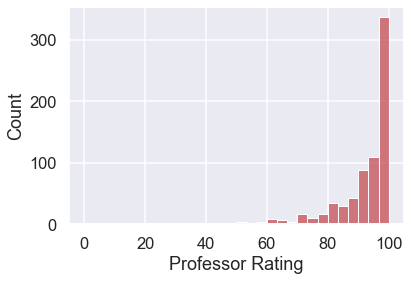

In [44]:
#histogram of rec Instructor
ax = sns.histplot(df_comb['recInstr'], bins = 30, color ='r')

ax.set(xlabel="Professor Rating")

The histogram has a left skewed distribution, meaning there are more values that are larger.

Now let us take a look at distribution for GrossPay

In [45]:
df_comb['GrossPay'].describe()

count       738.000000
mean     131692.802168
std       82810.228622
min        4135.000000
25%       67048.500000
50%      122733.500000
75%      179912.250000
max      530309.000000
Name: GrossPay, dtype: float64

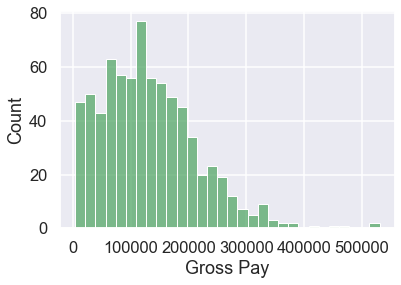

In [46]:
ax = sns.histplot(df_comb['GrossPay'], bins = 30, color ='g')

ax.set(xlabel="Gross Pay")

f2 = plt.gcf()

As shown on the histogram above, there is a few outlier near 500000, these outliers might skew the correlation and p value of the regression, thus we need to get rid of that outlier. Given that only 3 value appears to be within that grosspay bracket, we can logically conclude that the outliers are not representative of the population, and are most likely due to external factors like rare award grants. To get rid of it, we use the quantile function to get rid of the gross pay rows where gross pay value is outside of the 99 percent quantile. After that, we replotted the histogram to make sure the outlier is removed.

In [47]:
q = df_comb["GrossPay"].quantile(0.99)
df_comb = df_comb[df_comb["GrossPay"] < q]

In [48]:
sns.set(rc = {'figure.figsize':(15,6)})

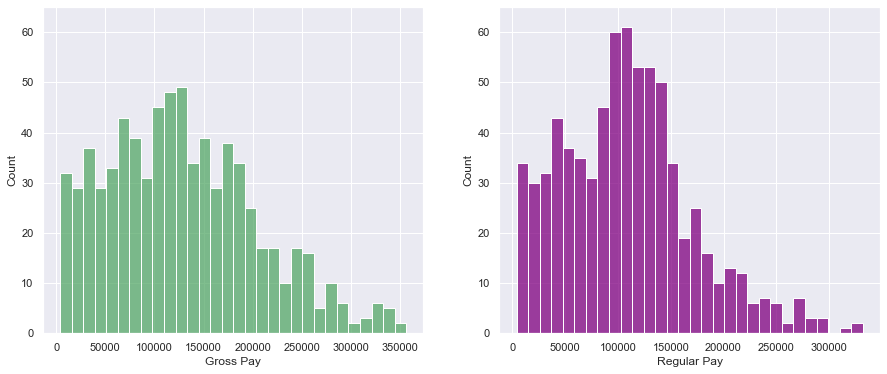

In [49]:
fig_dims = (40, 10)
fig, ax = plt.subplots(1,2)

reg_sns = sns.histplot(df_comb['GrossPay'], bins = 30, color ='g', ax=ax[0])
gro_sns = sns.histplot(df_comb['RegularPay'], bins = 30, color ='purple', ax=ax[1])

reg_sns.set_ylim(0,65)
gro_sns.set_ylim(0,65)

reg_sns.set(xlabel="Gross Pay")
gro_sns.set(xlabel="Regular Pay")

f2 = plt.gcf()

The Gross Pay histogram has a right skewed distribution, meaning there are more smaller values then the larger values.

The Regular Pay histogram has a right skewed distribution, meaning there are more smaller values then the larger values. It also shows that there are no outliers, since data are contained in a reasonable range. 

We felt that by simply looking at the gross pay data, it does not accurately represent what we meant in professor pay. Rather, we felt that regular base pay salary for professor teaching and research would be a better reflection of what we initially meant in our hypothesis. So Now we look at distribution of regular pay.

In [50]:
df_comb['RegularPay'].describe()

count       730.000000
mean     108540.652055
std       62013.030349
min        4135.000000
25%       59764.000000
50%      105591.500000
75%      142455.500000
max      331800.000000
Name: RegularPay, dtype: float64

[Text(0.5, 0, 'Regular Pay')]

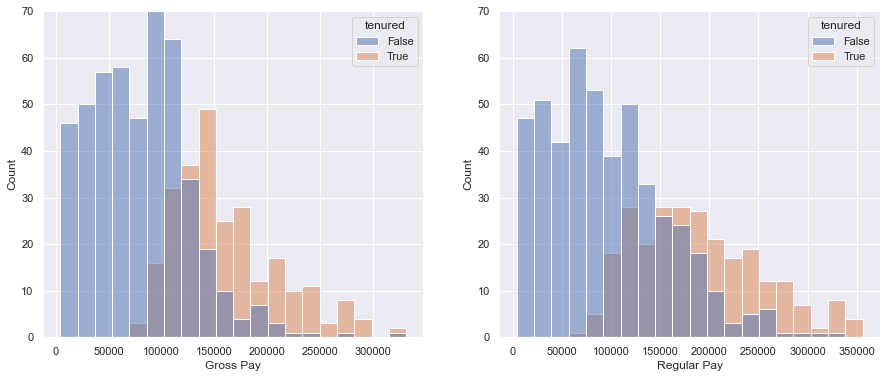

In [51]:
fig, ax = plt.subplots(1,2)

reg_sns = sns.histplot(df_comb, x="RegularPay", hue="tenured", bins=20, ax=ax[0])
gro_sns = sns.histplot(df_comb, x="GrossPay", hue="tenured", bins=20, ax=ax[1])

reg_sns.set_ylim(0,70)
gro_sns.set_ylim(0,70)

reg_sns.set(xlabel="Gross Pay")
gro_sns.set(xlabel="Regular Pay")

In [52]:
sns.set(rc = {'figure.figsize':(7, 4)})

[Text(0.5, 0, 'Tenured')]

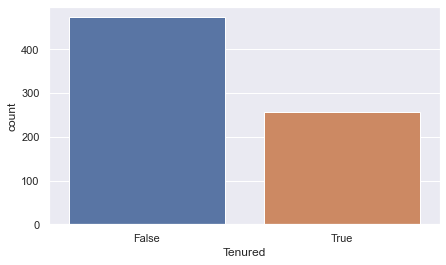

In [53]:
ax = sns.countplot(x='tenured', data=df_comb)
ax.set(xlabel="Tenured")

The following box plot compares professor ratings according to their tenure status.

[Text(0.5, 0, 'Tenured')]

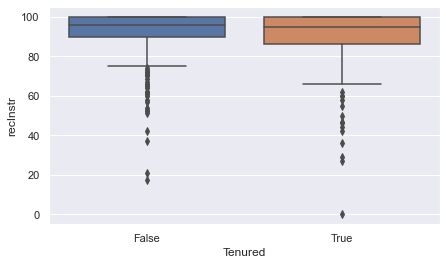

In [54]:
ax = sns.boxplot(data=df_comb, x="tenured", y="recInstr")
ax.set(xlabel="Tenured")

The following box plot compares the regular pay of professsors according to their tenure status.

[Text(0.5, 0, 'Tenured')]

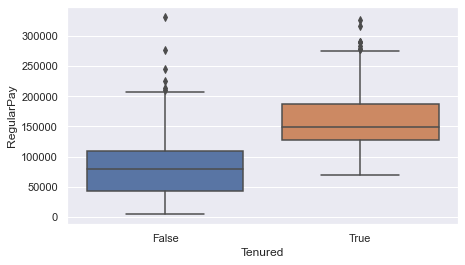

In [55]:
ax = sns.boxplot(data=df_comb, x="tenured", y="RegularPay")
ax.set(xlabel="Tenured")

Now we want to see if there is a correlation between Salary (Gross Pay) and Rating (recInstr) by running an inferrential analysis.

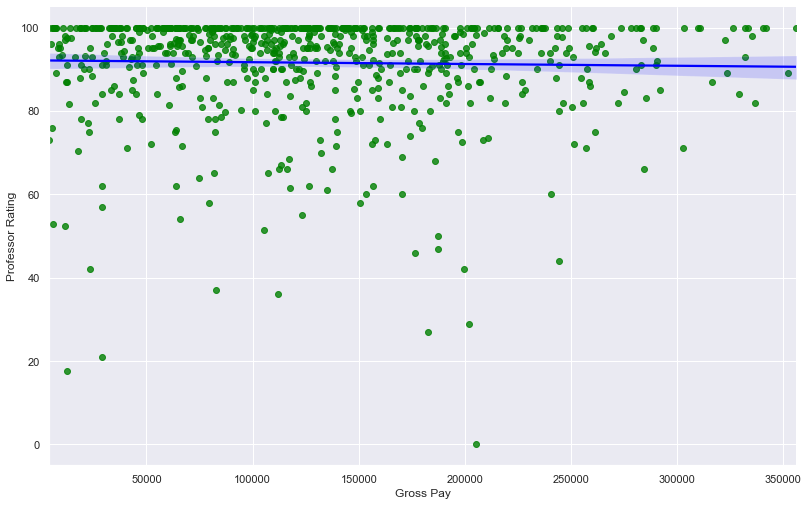

In [56]:
ax = sns.lmplot(
    x = 'GrossPay',
    y = 'recInstr', 
    data = df_comb,
    fit_reg=True,
    scatter_kws={'color':'green'},
    line_kws={'color':'blue'},
    aspect=1.6,
    height=7
)

ax.set(xlabel="Gross Pay")
ax.set(ylabel="Professor Rating")
#plot relational plot to see if theres anything

The line has a small slope, and the points do not seem to follow along the line with equal distribution, so it is unlikely there is a correlation. We will execute a linear regression with this data to confirm this.

In [57]:
df = df_comb[['recInstr', 'GrossPay']]
df.columns = ['rating','GrossPay']
outcome, predictors = patsy.dmatrices('rating ~ GrossPay', df)

mod_log = sm.OLS(outcome, predictors)

fit_res = mod_log.fit()

print(fit_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4947
Date:                Thu, 09 Dec 2021   Prob (F-statistic):              0.482
Time:                        22:10:45   Log-Likelihood:                -2827.8
No. Observations:                 717   AIC:                             5660.
Df Residuals:                     715   BIC:                             5669.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.1228      0.916    100.536      0.0

Looking at the summary above, we see that the p value is large (>0.05). Therefore, there is no statistically significant relationship between the predictor variable, GrossPay, and the response variable, recInstr.

Now we want to see if there is a correlation between Salary (Regular Pay) and Rating (recInstr) by running an inferrential analysis.

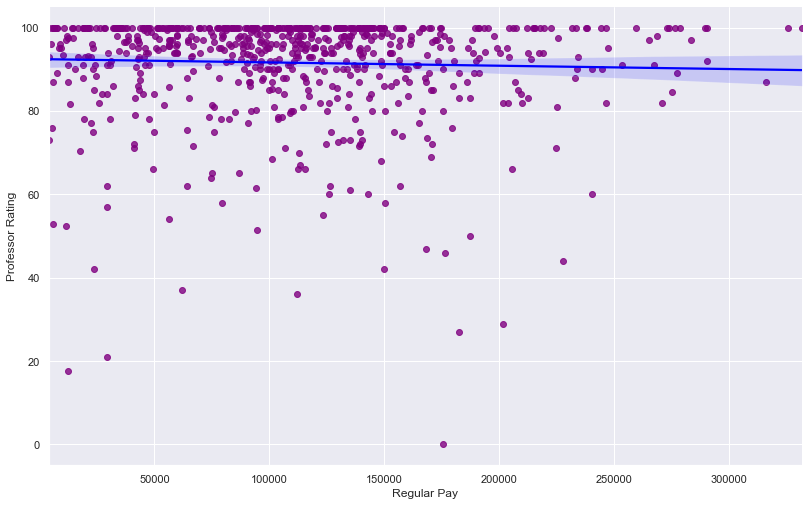

In [58]:
ax = sns.lmplot(
    x = 'RegularPay',
    y = 'recInstr', 
    data = df_comb,
    fit_reg=True,
    scatter_kws={'color':'purple'},
    line_kws={'color':'blue'},
    aspect=1.6,
    height=7
)

ax.set(xlabel="Regular Pay")
ax.set(ylabel="Professor Rating")
#plot relational plot to see if theres anything

We want to take a look at the linear regression summary.

In [59]:
df = df_comb[['recInstr', 'RegularPay']]
df.columns = ['rating','RegularPay']
outcome, predictors = patsy.dmatrices('rating ~ RegularPay', df)

mod_log = sm.OLS(outcome, predictors)

fit_res = mod_log.fit()

print(fit_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.112
Date:                Thu, 09 Dec 2021   Prob (F-statistic):              0.292
Time:                        22:10:46   Log-Likelihood:                -2827.5
No. Observations:                 717   AIC:                             5659.
Df Residuals:                     715   BIC:                             5668.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.4356      0.946     97.747      0.0

Looking at the summary above, we see that the p value is large (>0.05). Therefore, there is no statistically significant relationship between the predictor variable, RegularPay, and the response variable, recInstr.

We are also interested in how tenure status may effect ratings. Our null hypothesis is there is no statistically significant relationship between the predictor variable, recInstr, and the response variable, tenured.

Let's take a look at distribution of salary and rating for tenured and non tenured professors.

In [60]:
sns.set(rc = {'figure.figsize':(10,4.5)})

[Text(0, 0.5, 'Professor Rating')]

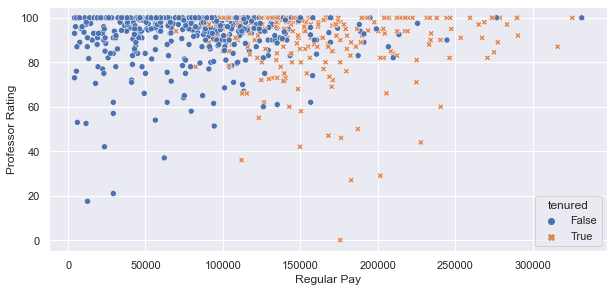

In [61]:
ax = sns.scatterplot(data=df_comb, x="RegularPay", y="recInstr", hue="tenured", marker= "o", style="tenured")

ax.set(xlabel="Regular Pay")
ax.set(ylabel="Professor Rating")

This scatter plot shows the distribution of data in relations to Regular Pay, recIntr, and tenured status.

[Text(0, 0.5, 'Professor Rating')]

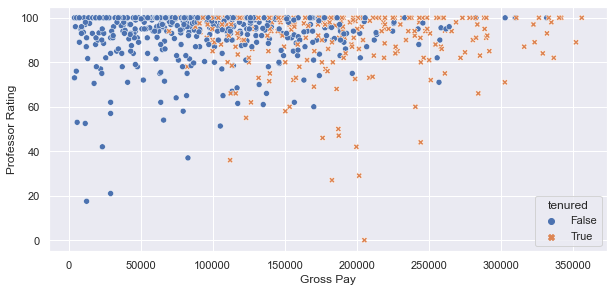

In [66]:
ax = sns.scatterplot(data=df_comb, x="GrossPay", y="recInstr", hue="tenured", style="tenured")
ax.set(xlabel="Gross Pay")
ax.set(ylabel="Professor Rating")

This scatter plot shows the distribution of data in relations to Gross Pay, recIntr, and tenured status.

Let's look do some regression model for tenure status and rating.

In [ ]:
ax = sns.lmplot(
    x = 'recInstr',
    y = 'tenured', 
    data = df_comb,
    fit_reg=True,
    scatter_kws={'color':'red'},
    line_kws={'color':'blue'},
    aspect=2,
    height=4.5
)

ax.set(xlabel="Professor Rating")
ax.set(ylabel="Tenured")

looking the regression plot that we plotted, we cannot infer any relationship between the variables. The reason of it is because the variable "tenured" is boolean, while the "recInstr" is continuous, and the regression plot should be used for continuous variables. Thus, this plot is inefficient, and we will need to use another method to infer relationship between the variables.

We used a point biserial correlation between the two variables "recInstr" and "tenured". The point-biserial correlation coeffiecient can be used when one variable is dichotomized, while the other is continuous. 

In [ ]:
import scipy.stats as stats
df_comb = df_comb.dropna()
x = df_comb["tenured"]
y = df_comb["recInstr"]
#calculate point-biserial correlation
stats.pointbiserialr(x, y)

In [ ]:
sns.set(rc = {'figure.figsize':(6, 4)})

In [ ]:
ax = sns.pointplot(x="tenured", y="recInstr", data=df_comb)
ax.set(xlabel="Tenured")
ax.set(ylabel="Professor Rating")

The point biserial result shows a correlation of -0.09068705818761415, which means that there is a negative correlation between tenured and instructor recommendation. Looking at the pvalue, which is 0.01513701203386359, we can reject the null hypothesis as the values is smaller than the alpha values of 0.05, thus there is statistically significant relationship between the predictor variable, recInstr, and the response variable, tenured. 

# Using Machine learning to Predict Tenured or Not Based On Salary

In this section, we want to use machine learning to see if we can predict whether a person is tenured or not based on the gross pay, this is not entirely related to our hypothesis, but we so want to see if there is a method to find out more about the tenure status of a person. The machine learning model we will be using is from sklearn and is referenced from an article online linked below. We used the variables regular pay and tenured to create the model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

https://towardsdatascience.com/machine-learning-basics-naive-bayes-classification-964af6f2a965

First decide what needs to be the dependent and the independent variable, Gross pay is used as independent, and the tenured status is what we need to predict

In [ ]:
X = df_comb['RegularPay'].values
y = df_comb['tenured'].values

Split data into training and testing data, 20 percent test 80 percent train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Use sklearn, first need to transform the shape of the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.reshape(-1, 1) )
X_test = sc.transform(X_test.reshape(-1, 1))

Use Gaussian Naive Bayes to classify the data

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

Use the test data to test the model

In [ ]:
y_pred = classifier.predict(X_test) 
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

The model yield an accuracy of 80 percent, average performace

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

To check if the model works, use values to see if the predicted classifier works

In [ ]:
Xnew = [[0]]
ynew = classifier.predict(Xnew)
ynew

In [ ]:
Xnew = [[500000]]
ynew = classifier.predict(Xnew)
ynew

the classifier works as it predicted that a person who makes 0 dollars is untenured while someone who makes 500000 is tenured. 

# Results

We began our analysis of our data by running an inferential analysis on the variables Gross Pay and Rating. The goal is to see whether there is any relationship or correlation between how much a professor earns and their CAPEs rating. Upon running the analysis, we found that the linear line has a very small slope amongst the scatter plot data points. Our OLS regression results confirm that there is in fact no significant relationship between ratings and gross pay since the p value is large (>0.05). The conclusion is that there is no statistically significant relationship between the predictor variable, GrossPay, and the response variable, recInstr. The same was done with the variable Regular Pay and the result again shows no significant relationship. 

We moved onto analyzing the relationship between tenure status and ratings. Our initial plan was to use the same inferential analysis technique on tenure and ratings, however, our regress plot shows that no relationship can be inferred since tenure status is a boolean variable, not continuous. To analyze the correlation, we instead took to utilizing a point biserial correlation approach. This method proved fruitful, as the variables showed a significant correlation. In our analysis, we find that there is a negative correlation of -0.0907 between tenure status and instructor recommendation. With a p value of 0.015, we can reject the null hypothesis and accept the alternative hypothesis that there is a significant relationship between tenure and instructor recommendation. The interpretation of this hypothesis is as follows: Tenured professors are more likely to receive a lower recommendation score from students compared to non tenured professors. 

Heading into predictive analysis, we decided to use machine learning to see if we can predict whether a person is tenured or not based on the variable Gross Pay. This was strictly for the purpose of inquiry and is not intended to contribute or disprove our hypothesis. We were able to successfully build a machine learning model that can classify a person based on salary input. 

To summarize, our results show that there is no relationship between professor pay and professor ratings, however, there is a significant negative correlation between tenured professors and their student ratings. 


# Ethics & Privacy

The initial goal of our project was to identify any correlation between salary and student ratings, as well as tenure status and ratings. In our research question, we made sure to not utilize words such as teaching quality which would not be operationally defined in our case. Instead, we selected student ratings as the dependent variable and operationally defined term. This gives our research higher validity.

We have permission to use the data as the data is being collected from sources that are open to the ucsd student population as well as the public for use. For our professor pay datasets, we utilized the University of California annual employee pay website, originally created for the purpose of transparency for taxpayers.The data was scraped and collected through our self written program. The UC San Diego CAPEs ratings are accessible to students of this school. Given that we are authorized to view the CAPEs ratings, it can be inferred that utilization of the data for the sake of exploratory data analysis is permitted. The capes rating is used only internally for ucsd students, and for that reason, we made sure that data was unidentifiable to everyone.

We respect the privacy of professors, and we made an effort to anonymize our data whenever possible. Because we relied on professor names to find their CAPEs rating, it was not possible to make our data anonymous until after data collection. However, we anonymized our data set by removing names from our data once our tables are joined. After removal of names in our data set, no identifiable information remains throughout the data analysis, and post analysis. 
No biases can be identified throughout our study. Student CAPEs ratings are ultimately subjective ratings that take into account internal biases students might have.

Though the data analysis itself is not ethically concerning, this might not be the case if people use our exploratory data to make inferences and predictions. We don't have enough confidence and support to claim that our data is conclusive on the subject of tenureship and rating.It should also not be confused that rating is not directly reflective of teaching quality, and it would be unethical to assume otherwise.

# Conclusion & Discussion

Contrary to our hypothesis, UCSD professors with high salaries are not likely to receive lower approval ratings compared to those with a lower salary. When only taking tenureship into account, our hypothesis holds true: tenure status and CAPEs ratings are correlated. This means students should be wary when enrolling into classes with tenured professors. This research can have a minor impact in the way UCSD students approach the enrollment process. Moving forward, additional analysis of future academic years will be another step in keeping professors honest and will allow students to have the best education possible.

Limitations: For this research, we only did ratings from 1 year. More years would have benefitted the study to get a more robust conclusion with our findings. Also, the limited amount of data we had per professor limited the amount of in depth analysis we could make. As in, we could not analyze the influence in which gender, ageism, racism or personal prejudice can influence how a student would rate a professor. Another limitation is that our current model will not be able to generalize outside of UCSD. Other school systems (non research based colleges or even other UCs) have a strong likelihood of having differing results. Finally, we limited our study to a single variable (ratings) to relate professors' salaries and their ratings when there are multiple variables that could affect these results. 

# Team Contributions

*Specify who in your group worked on which parts of the project.*

- Overview: Jodie
- Research Question: Kelly, Sergio
- Background: Kelly
- Hypothesis: Josie, Mary, Jodie, Sergio, Kelly
- Dataset1 Search: Josie
- Dataset2 Search: Mary
- Data Cleaning: Josie, Mary, Jodie, Sergio
- EDA: Josie, Mary, Jodie, Sergio, Kelly
- Results: Jodie
- Ethics and Privacy: Jodie
- Conclusion: Sergio